# Project: Analyzing Natality Data Using Vertex AI and BigQuery

In [1]:
!pip install google-cloud-bigquery==1.25.0
!pip install --upgrade google-cloud-bigquery-storage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 2.5.0
    Uninstalling google-resumable-media-2.5.0:
      Successfully uninstalled google-resumable-media-2.5.0
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.0
    Uninstalling cachetools-5.3.0:
      Successfully uninstalled cachetools-5.3.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'credentials.cpython-310.pyc'
Consider using the `--user` option or check the permissions.



In [1]:
from google.cloud import bigquery
client = bigquery.Client()

In [2]:
sql = """
  SELECT
    plurality,
    COUNT(1) AS count,
    year
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(plurality) AND plurality > 1
  GROUP BY
    plurality, year
  ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


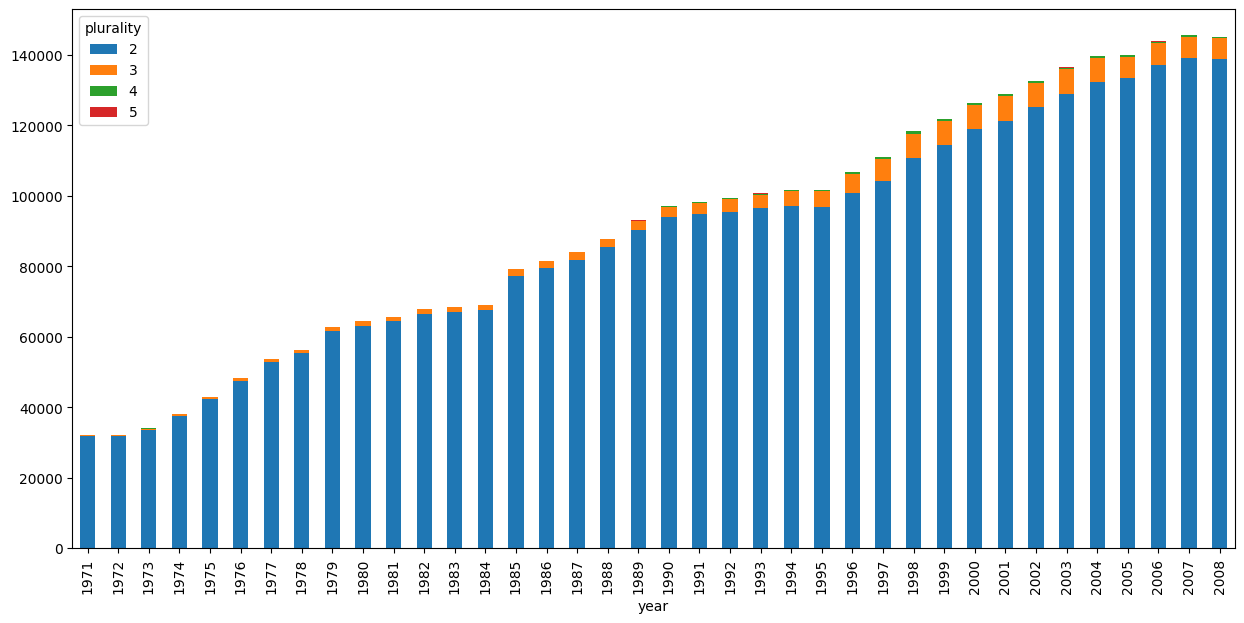

In [6]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7));

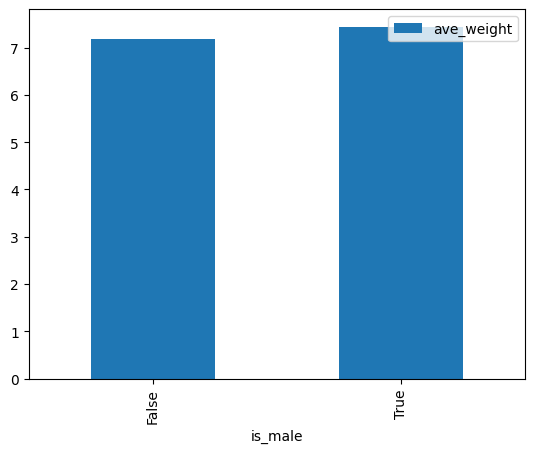

In [7]:
sql = """
  SELECT
    is_male,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  GROUP BY
    is_male
"""
df = client.query(sql).to_dataframe()
df.plot(x='is_male', y='ave_weight', kind='bar');

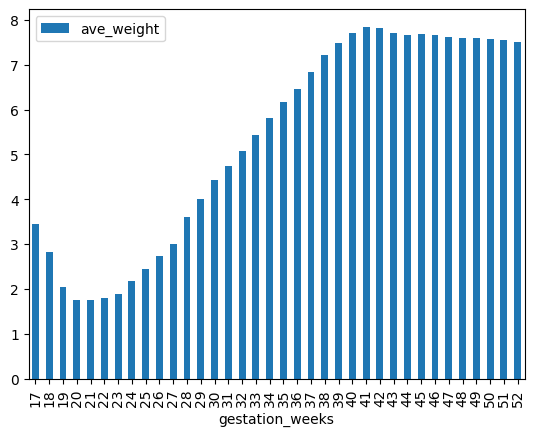

In [8]:
sql = """
  SELECT
    gestation_weeks,
    AVG(weight_pounds) AS ave_weight
  FROM
    `bigquery-public-data.samples.natality`
  WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
  GROUP BY
    gestation_weeks
  ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()
df.plot(x='gestation_weeks', y='ave_weight', kind='bar');